In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Scikit-learn and other ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, classification_report,confusion_matrix
)
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [2]:
# Load the dataset
data=pd.read_csv("df_final.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,MaritalStatus_Married,MaritalStatus_Single,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,0,5.846428,1,245.240431,0.698417,2.489545,2.527916,0,48.990736,6.136514,...,False,True,False,False,False,False,False,False,True,False
1,1,5.846428,1,245.240431,0.698417,2.489545,2.527916,0,48.990736,6.136514,...,False,True,False,False,False,False,False,False,True,False
2,2,5.846428,1,245.240431,0.698417,2.489545,2.527916,0,48.990736,6.136514,...,False,True,False,False,False,False,False,False,True,False
3,3,5.846428,1,245.240431,0.698417,2.489545,2.527916,0,48.990736,6.136514,...,False,True,False,False,False,False,False,False,True,False
4,4,5.846428,1,245.240431,0.698417,2.489545,2.527916,0,48.990736,6.136514,...,False,True,False,False,False,False,False,False,True,False


In [4]:
print("\n EDA on Complete Dataset\n")
print("*" * 90)

# Display the dataset features/columns
print("\nFeatures/Columns:\n {}".format(data.columns))
print("*" * 90)

# Display the shape of the dataset
print("\n\nDataset Shape: Rows = {}, Columns = {}".format(data.shape[0], data.shape[1]))
print("*" * 90)

# Display the data types of each feature
print("\n\nData Types: \n{}".format(data.dtypes))
print("*" * 90)

# Check for NaN values in the dataset
print("\nContains NaN values in the cells: {}\n".format(data.isna().values.any()))
print("*" * 90)

# Display the total number of empty cells by columns
print("\nTotal Empty Cells by Columns:\n{}".format(data.isna().sum()), "\n\n")
print("*" * 90)


 EDA on Complete Dataset

******************************************************************************************

Features/Columns:
 Index(['Unnamed: 0', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_

Text(0, 0.5, 'Count')

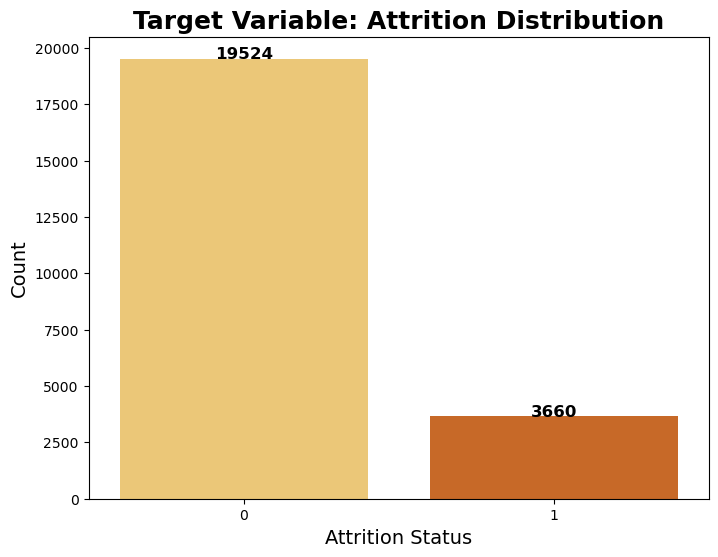

In [5]:
# Create the figure with a larger size
plt.figure(figsize=(8, 6))
# Create the countplot for 'Attrition' column
ax = sns.countplot(x='Attrition', data=data, palette='YlOrBr')
# Annotate counts on the bars
for bar in ax.patches:
    count = int(bar.get_height())  
    x_pos = bar.get_x() + bar.get_width() / 2  # Center the text on the bar
    y_pos = bar.get_height()  # Position the text above the bar
    ax.text(x_pos, y_pos + 0.5, f'{count}', ha='center', fontsize=12, fontweight='bold')
# Customize the title and labels
plt.title('Target Variable: Attrition Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Attrition Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

#### Class Imbalance Analysis

In the dataset, the distribution of the target variable indicates a significant class imbalance:

- **Class 0 (Majority)**: 19,524 instances
- **Class 1 (Minority)**: 3,660 instances

This results in a skewed class ratio of approximately **84.2% (Class 0)** to **15.8% (Class 1)**. 

Such an imbalance can lead to biased model predictions, where the model favors the majority class and fails to effectively predict the minority class. Addressing this imbalance is crucial for building a robust and fair machine learning model.

# Splitting the dataset into features (X) and the target variable (y)

In [6]:
X=data.drop(['Attrition','Unnamed: 0'],axis=1)
y=data['Attrition']
print('Independent Features :',X.shape)
print('Dependent Features :',y.shape)

Independent Features : (23184, 52)
Dependent Features : (23184,)


In [7]:
# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Displaying the shapes of the splits
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (16228, 52)
y_train shape: (16228,)
X_test shape: (6956, 52)
y_test shape: (6956,)


In [8]:
# Applying SMOTE to balance the classes
X_resampled, y_resampled = SMOTE(sampling_strategy=0.7, random_state=42).fit_resample(X_train, y_train)
# Displaying the new shapes after resampling
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")

Resampled X shape: (23198, 52)
Resampled y shape: (23198,)


### Standardizing the Data

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
print('Scaled X_train shape:', X_train_scaled.shape)
print('Scaled X_test shape:', X_test_scaled.shape)

Scaled X_train shape: (23198, 52)
Scaled X_test shape: (6956, 52)


# Model Training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier 

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_resampled)

    # Evaluate on test set
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

    # Store results
    results[name] = {
        "Test Accuracy": accuracy,
        "CV Mean Accuracy": cv_scores.mean(),
        "CV Std Dev": cv_scores.std(),
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    # Print results
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"CV Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Summary of results
print("\nSummary of Results:")
for model, metrics in results.items():
    print(f"{model}: Test Accuracy = {metrics['Test Accuracy']:.4f}, CV Mean Accuracy = {metrics['CV Mean Accuracy']:.4f}")


Training Logistic Regression...
Test Accuracy: 0.8156
CV Mean Accuracy: 0.7728 ± 0.0456
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5878
           1       0.40      0.40      0.40      1078

    accuracy                           0.82      6956
   macro avg       0.65      0.65      0.65      6956
weighted avg       0.82      0.82      0.82      6956

Confusion Matrix:
 [[5237  641]
 [ 642  436]]

Training Decision Tree...
Test Accuracy: 0.9932
CV Mean Accuracy: 0.9872 ± 0.0016
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       0.98      0.98      0.98      1078

    accuracy                           0.99      6956
   macro avg       0.99      0.99      0.99      6956
weighted avg       0.99      0.99      0.99      6956

Confusion Matrix:
 [[5855   23]
 [  24 1054]]

Training Random Forest...
Test Ac

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define a focused parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],  # Focus on commonly effective depths
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Fine-grained learning rates
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],  # Regularization parameter
    'min_child_weight': [1, 3, 5],  # Control overfitting
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=30,  # Focused number of random parameter combinations
    cv=3,  # Reduced cross-validation folds for speed
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the Randomized Search to the data
xgb_random_search.fit(X_train_scaled, y_resampled)

# Output the best parameters and accuracy
print("Best XGBoost Parameters:", xgb_random_search.best_params_)
print("Best XGBoost Accuracy:", xgb_random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6}
Best XGBoost Accuracy: 0.9920254904666918


In [12]:
# Train the final XGBoost model with best parameters
final_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.6,
    n_estimators=100,
    min_child_weight=1,
    max_depth=10,
    learning_rate=0.1,
    gamma=1,
    colsample_bytree=0.6,
    random_state=42
)

# Fit the model on the training data
final_xgb_model.fit(X_train_scaled, y_resampled)

# Evaluate on the test set
y_pred = final_xgb_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

# Evaluate on the training set for training accuracy
y_train_pred = final_xgb_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_resampled, y_train_pred)

# Display results
print("Final XGBoost Test Accuracy:", test_accuracy)

Final XGBoost Test Accuracy: 0.9985623921794134


In [13]:
# Display results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.96%
Test Accuracy: 99.86%


In [14]:
# Print classification report and confusion matrix for test set
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      0.99      1.00      1078

    accuracy                           1.00      6956
   macro avg       1.00      1.00      1.00      6956
weighted avg       1.00      1.00      1.00      6956

Confusion Matrix (Test Set):
 [[5877    1]
 [   9 1069]]


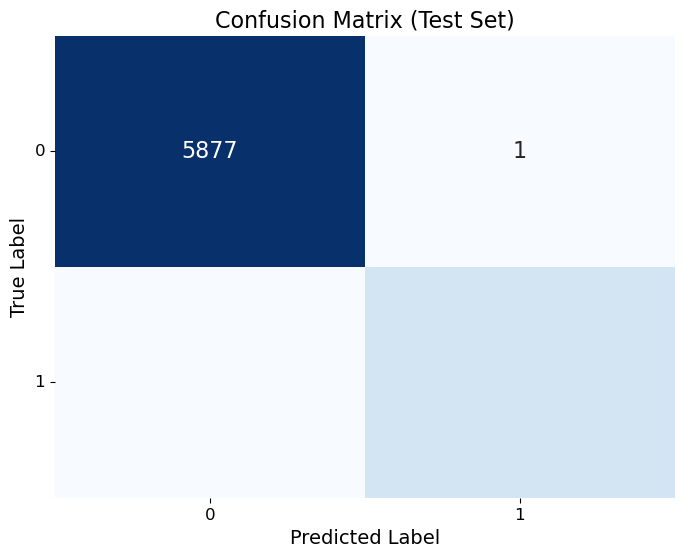

In [15]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (Test Set)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [16]:
from sklearn.metrics import recall_score

# Calculate recall for training and test sets
train_recall = recall_score(y_resampled, y_train_pred, average='binary')  
test_recall = recall_score(y_test, y_pred, average='binary')  

# Print recall for both training and test sets
print(f"Training Recall: {train_recall * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")

Training Recall: 99.91%
Test Recall: 99.17%


In [17]:
# Calculate precision for training and test sets
train_precision = precision_score(y_resampled, y_train_pred)
test_precision = precision_score(y_test, y_pred)
# Print precision for both training and test sets
print(f"Training Precision: {train_precision * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")

Training Precision: 100.00%
Test Precision: 99.91%


Training AUC: 1.0000
Test AUC: 0.9997
True Positives (TP): 1069
True Negatives (TN): 5877
False Positives (FP): 1
False Negatives (FN): 9


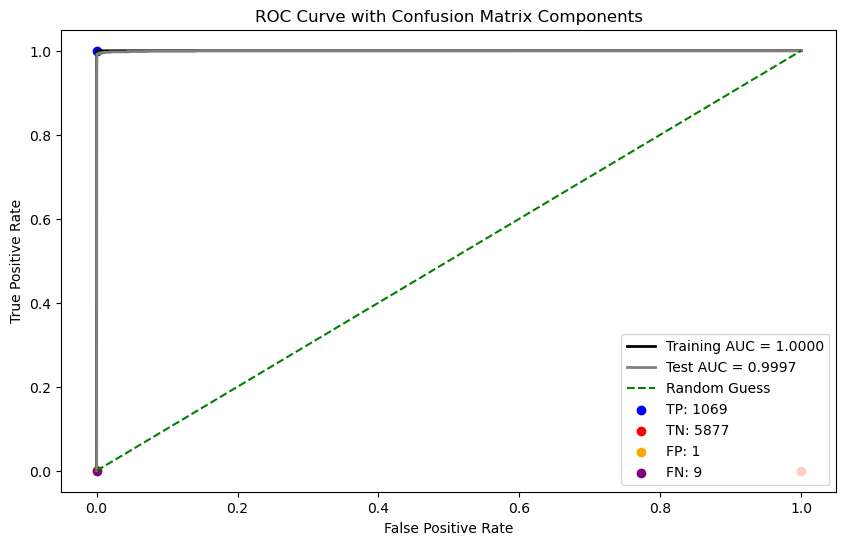

In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_resampled, final_xgb_model.predict_proba(X_train_scaled)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, final_xgb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Confusion matrix for the test set
y_test_pred = final_xgb_model.predict(X_test_scaled)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Print AUC values
print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

# Print confusion matrix components
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='black', lw=2, label=f'Training AUC = {roc_auc_train:.4f}')
plt.plot(fpr_test, tpr_test, color='grey', lw=2, label=f'Test AUC = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guess')

# Annotate TP, TN, FP, FN on the graph
plt.scatter(0, 1, color='blue', label=f'TP: {tp}')  # TP corresponds to TPR=1, FPR=0
plt.scatter(1, 0, color='red', label=f'TN: {tn}')  # TN corresponds to TPR=0, FPR=1
plt.scatter(fpr_test[1], tpr_test[1], color='orange', label=f'FP: {fp}')  # Example point for FP
plt.scatter(fpr_test[0], tpr_test[0], color='purple', label=f'FN: {fn}')  # Example point for FN

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Confusion Matrix Components')
plt.legend(loc='lower right')
plt.show()

# 🌟 Model Evaluation: XGBoost Classifier

Leveraging the XGBoost Classifier, the following evaluation metrics were achieved:

## 🔍 Recall
- **Training Recall**: 99.91%  
  The model successfully identified 99.91% of positive cases in the training set.  
- **Test Recall**: 99.17%  
  It performed remarkably on the test set, identifying 99.17% of positive cases.  

## 🎯 Accuracy
- **Training Accuracy**: 99.96%  
  Achieved an impressive 99.96% accuracy on the training set, with nearly perfect classification.  
- **Test Accuracy**: 99.86%  
  Demonstrated outstanding accuracy on the test set, with 99.86% of samples correctly classified.  

## ✅ Precision
- **Training Precision**: 100.00%  
  The model achieved flawless precision on the training set, with no false positives.  
- **Test Precision**: 99.91%  
  Maintained high precision on the test set, significantly minimizing false positives.  

## 📈 AUC (Area Under the Curve)
- **Training AUC**: 100.00%  
  A perfect AUC score on the training set, indicating flawless class separation.  
- **Test AUC**: 99.97%  
  Almost perfect class distinction on the test set, with an AUC of 99.97%.  

## 🏆 Summary
The XGBoost Classifier exhibits exceptional performance with near-perfect metrics across all evaluation criteria:

### Key Highlights
- Strong generalization capabilities, ensuring consistent performance on unseen data.  
- Maintains high classification quality, minimizing both false positives and false negatives.  